In [37]:
from PIL import Image
import skimage.feature
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt

In [62]:
img = Image.open('airport.tif')
img.load()
data = np.array(img, dtype=np.float32)

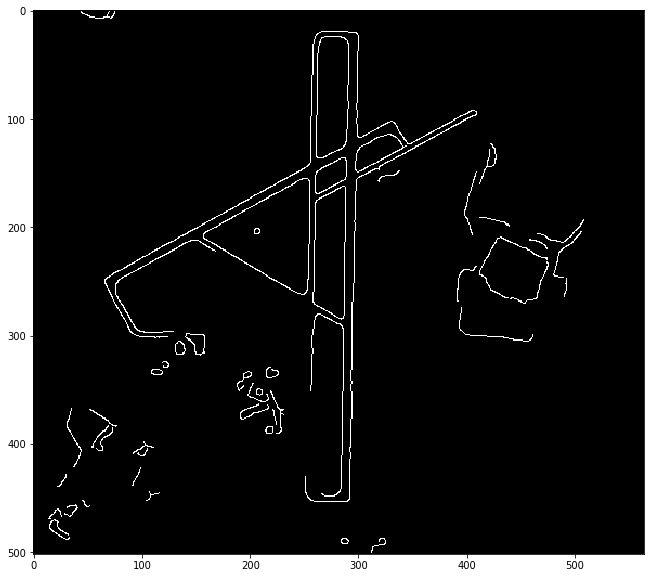

In [90]:
canny_edges = skimage.feature.canny(data, low_threshold=70, high_threshold=130, sigma=2)

plt.figure(figsize=(20,10))
plt.imshow(canny_edges, cmap='gray')

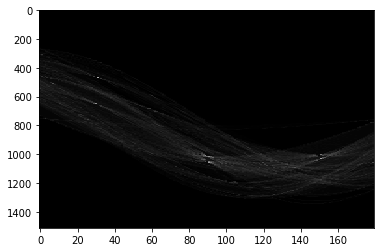

In [85]:
hough_line = skimage.transform.hough_line(canny_edges)

plt.imshow(hough_line[0], cmap='gray', aspect='auto')

In [103]:
hough_peaks = skimage.transform.hough_line_peaks(hough_line[0], hough_line[1], hough_line[2], num_peaks=3)

Text(0.5, 1.0, 'Detected lines')

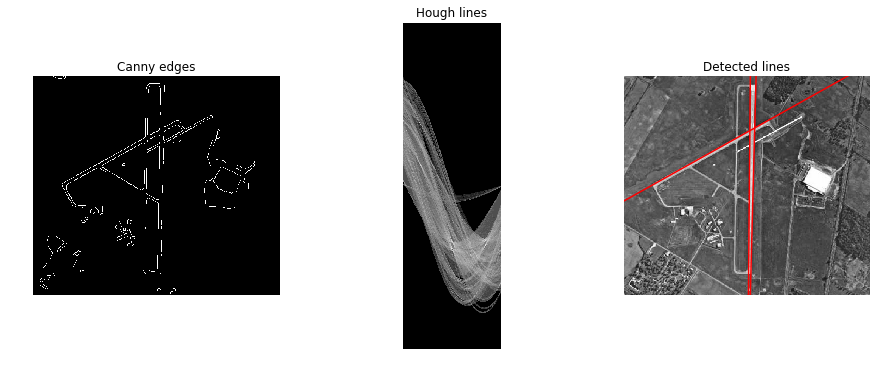

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(canny_edges, cmap='gray')
ax[0].set_axis_off()
ax[0].set_title('Canny edges')

ax[1].imshow(np.log(1 + hough_line[0]),
             extent=[np.rad2deg(hough_line[1][-1]), np.rad2deg(hough_line[1][0]), hough_line[2][-1], hough_line[2][0]],
             cmap='gray', aspect=1/2.5)
ax[1].set_axis_off()
ax[1].set_title('Hough lines')

ax[2].imshow(data, cmap='gray')
for _, angle, dist in zip(*hough_peaks):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - data.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, data.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, data.shape[1]))
ax[2].set_ylim((data.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')